In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
frecuencia = np.array([0.025,0.05,0.075,0.1,0.125,0.150,0.175])
voltaje = np.array([10.7,21.6,32.4,43.1,53.9,64.9,75.4])
error = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1])

In [3]:
def calcular_c(err,x,y):

    #calculo w
    w = 1/np.square(err)

    #terminos suma
    a = np.sum(w*np.square(x))
    b = np.sum(w*y)
    c = np.sum(w*x)
    d = np.sum(w*x*y)

    #terminos delta
    e = np.sum(w)
    f = np.sum(w*np.square(x))
    g = np.square(np.sum(w*x))
    delta = f*e - g

    #calculo c
    c = (a*b - c*d)/delta

    return c

In [4]:
def calcular_m(err,x,y):

    #calculo w
    w = 1/np.square(err)

    #terminos suma
    a = np.sum(w)
    b = np.sum(w*x*y)
    c = np.sum(w*x)
    d = np.sum(w*y)

    #terminos delta
    e = np.sum(w)
    f = np.sum(w*np.square(x))
    g = np.square(np.sum(w*x))
    delta = f*e - g

    #calculo m
    m = (a*b - c*d)/delta

    return m

In [5]:
def calcular_ac(err,x):

    #calculo w
    w = 1/np.square(err)

    #terminos suma
    a = np.sum(w*np.square(x))

    #terminos delta
    e = np.sum(w)
    f = np.sum(w*np.square(x))
    g = np.square(np.sum(w*x))
    delta = f*e - g

    #calculo ac
    ac = np.sqrt(a/delta)

    return ac

In [6]:
def calcular_am(err,x):
    
        #calculo w
        w = 1/np.square(err)
    
        #terminos suma
        a = np.sum(w)

        #terminos delta
        e = np.sum(w)
        f = np.sum(w*np.square(x))
        g = np.square(np.sum(w*x))
        delta = f*e - g
    
        #calculo am
        am = np.sqrt(a/delta)
    
        return am

In [7]:
c = calcular_c(error,frecuencia,voltaje)
m = calcular_m(error,frecuencia,voltaje)
ac = calcular_ac(error,frecuencia)
am = calcular_am(error,frecuencia)

In [8]:
c

-0.02857142857142859

In [9]:
m

431.71428571428567

In [10]:
ac

0.0845154254728517

In [11]:
am

0.7559289460184546

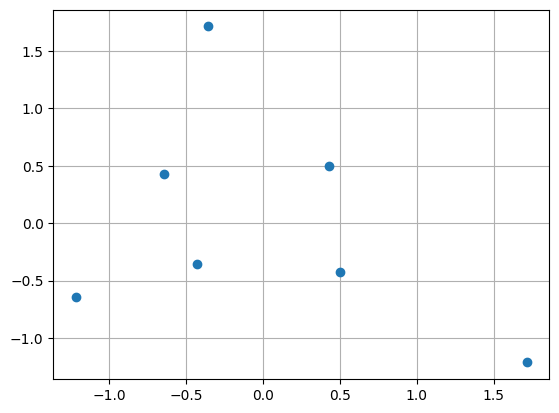

In [12]:
model = c + m*frecuencia
residuals = voltaje-model
normalized_residuals = residuals/error
lagged = np.roll(normalized_residuals, -1)
plt.plot(normalized_residuals, lagged, 'o')
plt.grid()
plt.show()

In [13]:
def Durbin_Watson(residuals):
    return np.sum(np.square(normalized_residuals-lagged))/np.sum(normalized_residuals**2)

In [14]:
D = Durbin_Watson(residuals)
D

2.73076923076919

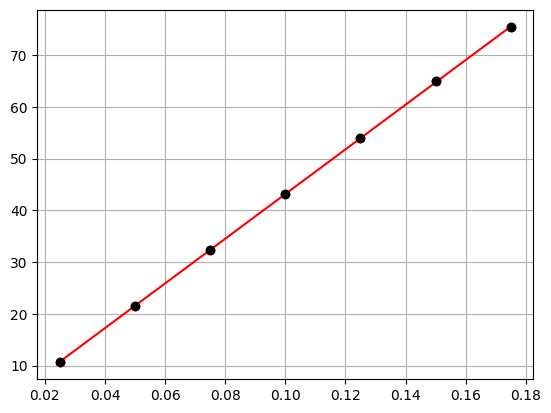

In [15]:
plt.scatter(frecuencia,voltaje,color='red')
plt.plot(frecuencia,model,color='red')
plt.errorbar(frecuencia,voltaje,error,fmt='o',color='black')
plt.grid()
plt.show()

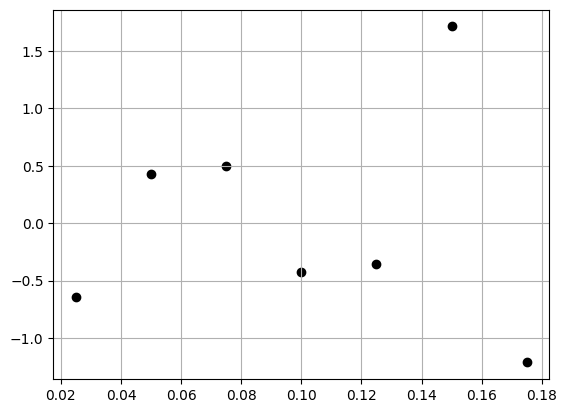

In [16]:
plt.scatter(frecuencia,normalized_residuals,color='black')
plt.grid()
plt.show()

In [17]:
def chi2(M, C):
    res = ((voltaje - (M * frecuencia + C)) / error) ** 2
    return np.sum(res)

In [18]:
M_values = np.linspace(1, 3, 1000)
C_values = np.linspace(-1, 1, 1000)
best_chi = np.inf
# Calculate chi-squared for each combination of parameters
chi2_grid = np.zeros((len(M_values), len(C_values)))
for i, M in enumerate(M_values):
    for j, C in enumerate(C_values):
        chi2_grid[i, j] = chi2(M, C)
        if chi2_grid[i, j] < best_chi:
            best_chi = chi2_grid[i, j]
            best_M = M
            best_C = C

In [19]:
best_M

3.0

In [20]:
best_C

1.0

In [21]:
best_chi

1547225.75

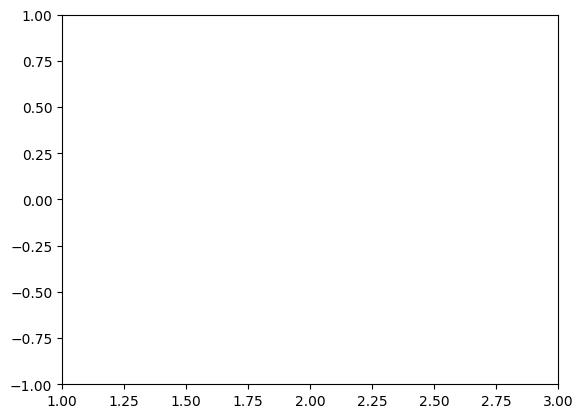

In [22]:
contour_levels = [best_chi + 1]  # Change in chi-squared of 1
plt.contour(M_values, C_values, chi2_grid, levels=contour_levels, colors='r')

In [23]:

M_values = np.linspace(1, 3, 500)
C_values = np.linspace(-1, 1, 500)
best_C_array = np.full_like(M_values, best_C)
best_chi2_anterior = np.inf
diffChi2 = np.inf
best_chi2 = best_chi
k = 0

while (diffChi2 > 10e-2 and k < 100):

    k += 1

    best_diff = np.inf
    # Minimizar chi2 para M
    chi2_grid = np.zeros((len(M_values), len(best_C_array)))

    for i, M in enumerate(M_values):
        for j, C in enumerate(best_C_array):

            chi2_grid[i, j] = chi2(M, C)
            diff = abs(chi2_grid[i, j] - (best_chi2+1))
            if diff < best_diff:
                best_chi2 = chi2_grid[i, j]
                best_M2 = M
                best_diff = diff

    # Minimizar chi2 para lo que no es M

    best_M_array = np.full_like(C_values, best_M2)

    chi2_grid = np.zeros((len(best_M_array), len(C_values)))

    for i, M in enumerate(best_M_array):
        for j, C in enumerate(C_values):
            
            chi2_grid[i, j] = chi2(M, C)
            if chi2_grid[i, j] < best_chi2:
                best_chi2 = chi2_grid[i, j]
                best_C2 = C

    diffChi2 = abs(best_chi2 - best_chi2_anterior)

    best_C_array = np.full_like(M_values, best_C2)

    print(k)

diffM = abs(best_M2 - best_M)
diffM

NameError: name 'best_C2' is not defined

In [ ]:
best = best_chi
previous_best = float('inf')
previous_diff = float('inf')
i = 0
while (i<1000):
    M_values = np.linspace(1, 3, 1000)
    C = best_C
    best_chi2_n = float('inf')
    best_params = None

    # busca mejor parametro
    for M in M_values:
            current_chi2 = chi2(M, C)
            diff = abs(current_chi2 - (best+1))
            if diff < 0.05 and diff < previous_diff:
                best_chi2_n = current_chi2
                M_best2 = M

    previous_best = best
    previous_diff = diff
    best = chi2(M_best2, C)
    i += 1


print(i)
difM = abs(M_best2 - best_M)

best = best_chi
previous_best = float('inf')
previous_diff = float('inf')
i = 0
while (i<1000):
    C_values = np.linspace(-1, 1, 1000)
    M = best_M
    best_chi2_n = float('inf')
    best_params = None

    # busca mejor parametro
    for C in C_values:
            current_chi2 = chi2(M, C)
            diff = abs(current_chi2 - (best+1))
            if diff < 0.05 and diff < previous_diff:
                best_chi2_n = current_chi2
                C_best2 = C

    previous_best = best
    previous_diff = diff
    best = chi2(M, C_best2)
    i += 1

difC = abs(C_best2 - best_C)


1000


In [ ]:
difM

0.026026026026026106

In [ ]:
difC

0.02202202202202197